<h1 style="font-size:40px;">TripFare : Predicting Urban Taxi Fare with Machine Learning</h1>

In [166]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer


import warnings
warnings.filterwarnings('ignore')

<h1 style="font-size:40px;">Read the data using Pandas</h1>

In [4]:
data = pd.read_csv(r"C:\Users\Appu\Desktop\data science\python\taxi_fare.csv")
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


<h1 style="font-size:40px;">Understanding the Data</h1>

In [6]:
data.shape

(212345, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [8]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [9]:
data.duplicated().sum()

0

<h1 style="font-size:40px;">Unique & Categorical Insights</h1>

In [17]:
data.rename(columns={
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime'    
}, inplace=True)

In [19]:
data.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [21]:
for col in data.columns:
  print(f"{col}:\n Unique values:",data[col].nunique(),"\n", data[col].unique())
  print()
  print()

VendorID:
 Unique values: 2 
 [1 2]


pickup_datetime:
 Unique values: 61208 
 ['2016-03-01 00:00:00' '2016-03-01 00:00:01' '2016-03-01 00:00:02' ...
 '2016-03-01 12:15:36' '2016-03-01 12:15:37' '2016-03-01 12:15:38']


dropoff_datetime:
 Unique values: 63607 
 ['2016-03-01 00:07:55' '2016-03-01 00:11:06' '2016-03-01 00:31:06' ...
 '2016-03-01 12:37:29' '2016-03-01 12:38:53' '2016-03-01 12:38:22']


passenger_count:
 Unique values: 7 
 [1 2 3 5 6 4 0]


pickup_longitude:
 Unique values: 14794 
 [-73.97674561 -73.98348236 -73.78202057 ... -73.82849884 -73.83630371
 -73.87155914]


pickup_latitude:
 Unique values: 30504 
 [40.76515198 40.76792526 40.64480972 ... 40.72326279 40.79697418
 40.64451218]


RatecodeID:
 Unique values: 7 
 [ 1  3  2  5  4  6 99]


store_and_fwd_flag:
 Unique values: 2 
 ['N' 'Y']


dropoff_longitude:
 Unique values: 18029 
 [-74.00426483 -74.0059433  -73.97454071 ... -74.01698303 -73.93318176
 -73.80863953]


dropoff_latitude:
 Unique values: 34903 
 [40.746128

<h1 style="font-size:40px;">Feature Engineering</h1>

In [24]:
# Convert pickup_datetime and dropoff_datetime to datetime object
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], utc=True)
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'], utc=True)

In [25]:
# Convert UTC to EDT (Eastern Daylight Time)
data['pickup_datetime'] = data['pickup_datetime'].dt.tz_convert('US/Eastern')
data['dropoff_datetime'] = data['dropoff_datetime'].dt.tz_convert('US/Eastern')

In [27]:
#Adding new column trip distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of Earth in kilometers
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

data['trip_distance'] = data.apply(
    lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                          row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [29]:
# Create 'pickup_day' column as 'Weekday' or 'Weekend'
data['pickup_day'] = data['pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
data['pickup_day'] = data['pickup_day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [30]:
#AM PM indicator

data['am_pm'] = data['pickup_datetime'].dt.strftime('%p')  # AM or PM

In [31]:
#is night(Binary flag for late-night/early-morning trips)

data['is_night'] = data['pickup_datetime'].dt.hour.apply(lambda x: 1 if (x >= 22 or x < 5) else 0)

In [32]:
#rush hour

data['is_rush_hour'] = data['pickup_datetime'].dt.hour.apply(
    lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0
)

In [33]:
#fare perkm

data['fare_per_km'] = data['fare_amount'] / data['trip_distance']

In [34]:
data = data.drop('VendorID', axis=1)

In [35]:
(data["RatecodeID"] == 1).sum()

207479

In [36]:
207479/212345

0.97708446160729

In [39]:
data = data.drop('RatecodeID', axis=1)

In [40]:
print(data['store_and_fwd_flag'].value_counts())

store_and_fwd_flag
N    211684
Y       661
Name: count, dtype: int64


In [41]:
data = data.drop('store_and_fwd_flag', axis=1)

In [42]:
print(data['improvement_surcharge'].value_counts())

improvement_surcharge
 0.3    212194
-0.3       106
 0.0        45
Name: count, dtype: int64


In [44]:
data = data.drop('improvement_surcharge', axis=1)

In [50]:
print(data['tolls_amount'].value_counts())

tolls_amount
0.00     200726
5.54      10896
12.50       163
10.50       115
2.54         64
          ...  
7.62          1
14.05         1
30.54         1
11.00         1
18.75         1
Name: count, Length: 109, dtype: int64


In [58]:
print(data['mta_tax'].value_counts())

mta_tax
 0.5    211453
 0.0       791
-0.5       101
Name: count, dtype: int64


In [60]:
data.tail()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance,pickup_day,am_pm,is_night,is_rush_hour,fare_per_km
212340,2016-03-01 07:15:37-05:00,2016-03-01 07:38:53-05:00,1,-73.955688,40.782261,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.0,20.16,3.806279,Weekday,AM,0,1,4.203580
212341,2016-03-01 07:15:37-05:00,2016-03-01 07:38:22-05:00,1,-74.002197,40.715042,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.0,18.30,3.496576,Weekday,AM,0,1,4.432908
212342,2016-03-01 07:15:37-05:00,2016-03-01 07:18:18-05:00,1,-73.991173,40.733170,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.0,4.80,0.580119,Weekday,AM,0,1,6.895134
212343,2016-03-01 07:15:38-05:00,2016-03-01 07:22:47-05:00,2,-73.972099,40.786446,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.0,7.80,1.555737,Weekday,AM,0,1,4.499476
212344,2016-03-01 07:15:38-05:00,2016-03-01 07:34:59-05:00,1,-73.988770,40.712662,-73.944550,40.782276,2,20.5,0.0,0.5,0.00,0.0,21.30,8.590460,Weekday,AM,0,1,2.386368


In [62]:
data.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_distance',
       'pickup_day', 'am_pm', 'is_night', 'is_rush_hour', 'fare_per_km'],
      dtype='object')

In [64]:
data['trip_distance'] = data['trip_distance'].round(1)

In [66]:
data['fare_per_km'] = data['fare_per_km'].round(1)

<h1 style="font-size:40px;">EDA</h1>

Removing rows with value zero because it doesn't add any meaning and this removes any row where any of these four fields is zero, giving you a cleaner, more reliable dataset for EDA and regression modeling.

In [68]:
(data["trip_distance"] == 0).sum()

3633

In [70]:
(data["passenger_count"] == 0).sum()

9

In [72]:
(data["fare_per_km"] == 0).sum()

580

In [74]:
data_clean = data[
    (data['trip_distance'] != 0) &
    (data['passenger_count'] != 0) &
    (data['fare_per_km'] != 0)
].copy()

In [76]:
(data_clean["trip_distance"] == 0).sum()

0

In [78]:
(data_clean["passenger_count"] == 0).sum()

0

In [80]:
(data_clean["fare_per_km"] == 0).sum()

0

In [82]:
(data_clean["total_amount"] < 0).sum()

82

In [84]:
(data_clean["trip_distance"] < 0).sum()

0

In [86]:
(data_clean["fare_per_km"].isnull()).sum()

0

In [88]:
data_clean = data_clean[data_clean['total_amount'] > 0].copy()

In [90]:
(data_clean["total_amount"] < 0).sum()

0

In [92]:
data_clean.isnull().sum()

pickup_datetime      0
dropoff_datetime     0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
extra                0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
trip_distance        0
pickup_day           0
am_pm                0
is_night             0
is_rush_hour         0
fare_per_km          0
dtype: int64

<h2 style="font-size:40px;">handling unrealistic rows</h2>

Reduces noise and avoids nonsensical data points in regression.

Aligns with standard NYC taxi data cleaning practices—removing zero/fraud/corrupt trips.

In [94]:
df = data_clean.copy()
df['trip_distance'] = df['trip_distance'].mask(df['trip_distance'] > 50, np.nan)
df['total_amount'] = df['total_amount'].mask(df['total_amount'] > 300, np.nan)

df = df.dropna(subset=['trip_distance','total_amount','fare_per_km'])


In [96]:
df.isnull().sum()

pickup_datetime      0
dropoff_datetime     0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
extra                0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
trip_distance        0
pickup_day           0
am_pm                0
is_night             0
is_rush_hour         0
fare_per_km          0
dtype: int64

In [98]:
df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount', 'trip_distance',
       'pickup_day', 'am_pm', 'is_night', 'is_rush_hour', 'fare_per_km'],
      dtype='object')

In [100]:
null_rows_any = df[df.isnull().any(axis=1)]
print(null_rows_any)

Empty DataFrame
Columns: [pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, total_amount, trip_distance, pickup_day, am_pm, is_night, is_rush_hour, fare_per_km]
Index: []


In [102]:
(df['trip_distance'] <= 0) | (df['total_amount'] <= 0) | (df['fare_per_km'] <= 0)

0         False
1         False
2         False
3         False
4         False
          ...  
212340    False
212341    False
212342    False
212343    False
212344    False
Length: 208056, dtype: bool

In [104]:
cols = ['trip_distance', 'total_amount', 'fare_per_km']
mask = (df[cols] <= 0).any(axis=1)

print(f"Rows with any ≤0: {mask.sum()}")
df_clean = df[~mask].copy()

Rows with any ≤0: 0


In [106]:
df.isnull().sum()

pickup_datetime      0
dropoff_datetime     0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
extra                0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
trip_distance        0
pickup_day           0
am_pm                0
is_night             0
is_rush_hour         0
fare_per_km          0
dtype: int64

In [108]:
df.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_distance,pickup_day,am_pm,is_night,is_rush_hour,fare_per_km
0,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,12.35,3.1,Weekday,PM,0,1,2.9
1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,15.35,4.3,Weekday,PM,0,1,2.6
2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,63.80,16.6,Weekday,PM,0,1,3.3
3,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,41.62,9.0,Weekday,PM,0,1,3.5
4,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,113.80,20.4,Weekday,PM,0,1,4.8


<h2 style="font-size:40px;">visualisation</h2>

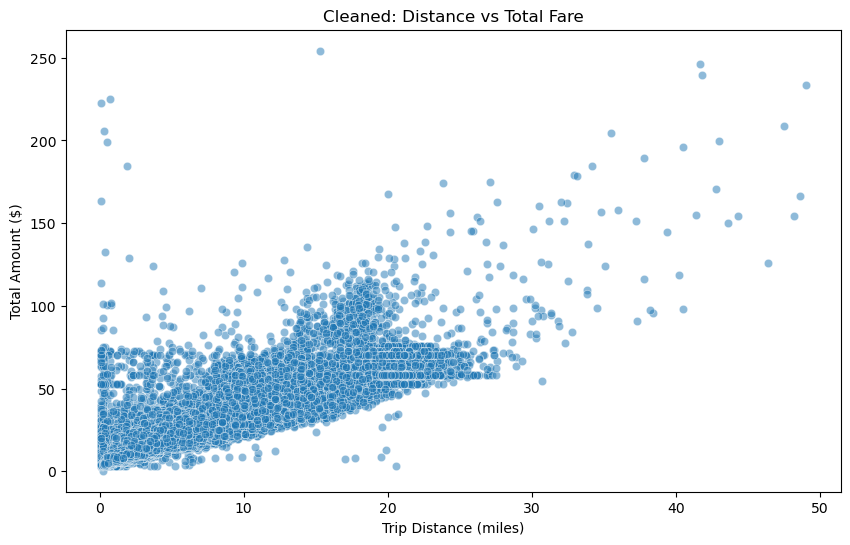

In [114]:
#Fare vs. Distance

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='trip_distance',
    y='total_amount',
    alpha=0.5
)
plt.title('Cleaned: Distance vs Total Fare')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.show()

A positive correlation: as distance increases, total amount tends to increase too. That aligns with fare structures charging per mile
You'll see spread in points, especially for short trips. Some short rides cost more than others, likely due to surcharges, minimum fare policies, or tips .

Longer rides show a more consistent positive trend but can still vary—due to traffic delays or difference in routes: they may cost more than simply per-mile pricing .

Some rides stick out—short rides with high charges or long rides with low totals. These could be due to tolls, incorrect data recording, or unusually long/short trips.

Each point represents one ride — plotted by how long the trip lasted versus how much the passenger paid in total.

A positive trend (points rising to the right) suggests longer trips tend to cost more — which is expected.

The spread around the trend indicates variability — perhaps due to differences in route efficiency, surge pricing, tolls, or tips.

You might notice clusters (e.g., short trips under ~5 minutes all costing a few dollars) and outliers (e.g., short trips with high total amount, or long trips with unusually low fares).

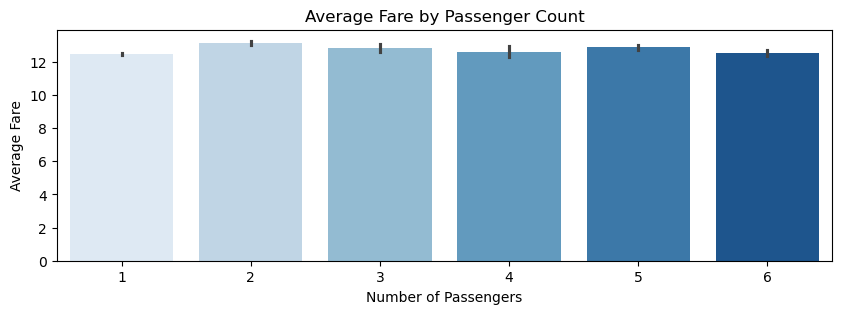

In [124]:
#Fare vs. Passenger Count
#For analyzing the relationship between Fare (continuous) and Passenger Count (categorical), here are the best visualization technique:

plt.figure(figsize=(10, 3))
sns.barplot(
    x='passenger_count',
    y='fare_amount',
    data=df,
    estimator='mean',
    ci=95,
    palette='Blues'
)
plt.title('Average Fare by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare')
plt.show()


Bars show the average fare for each passenger group (e.g., 1, 2, 3, 4+ passengers).

If the average fare is similar whether there's 1, 2, 3, or 4 passengers, it suggests that adding more passengers does not significantly increase the price. This often occurs because fare is primarily charged per mile/minute, not per passenger.

Fare structure: Taxi fares are based on distance and duration, not number of riders.

Trip characteristics: More passengers often ride together in situations like short group outings—these tend to have low fares.

Shared rides: In services where multiple passengers share half the fare, per-person fare drops even if total ride cost stays similar.



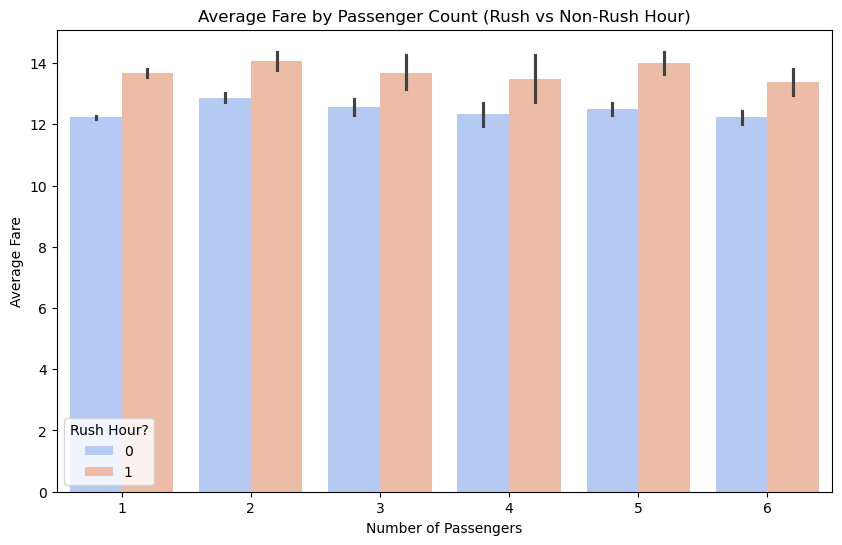

In [126]:
#adding rush hour as hue
plt.figure(figsize=(10, 6))
sns.barplot(
    x='passenger_count',
    y='fare_amount',
    hue='is_rush_hour',       # Add hue here
    data=df,
    estimator='mean',
    ci=95,
    palette='coolwarm',       # Choose a palette for visual clarity
    dodge=True                # Ensure bars are side-by-side
)

plt.title('Average Fare by Passenger Count (Rush vs Non-Rush Hour)')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare')
plt.legend(title='Rush Hour?')  # Descriptive legend
plt.show()

Fare is largely independent of passenger count
The fare structure in most taxi systems is based on distance and duration, not the number of passengers—so it doesn’t vary much if 1 or 3 people ride together even in the rush hour.

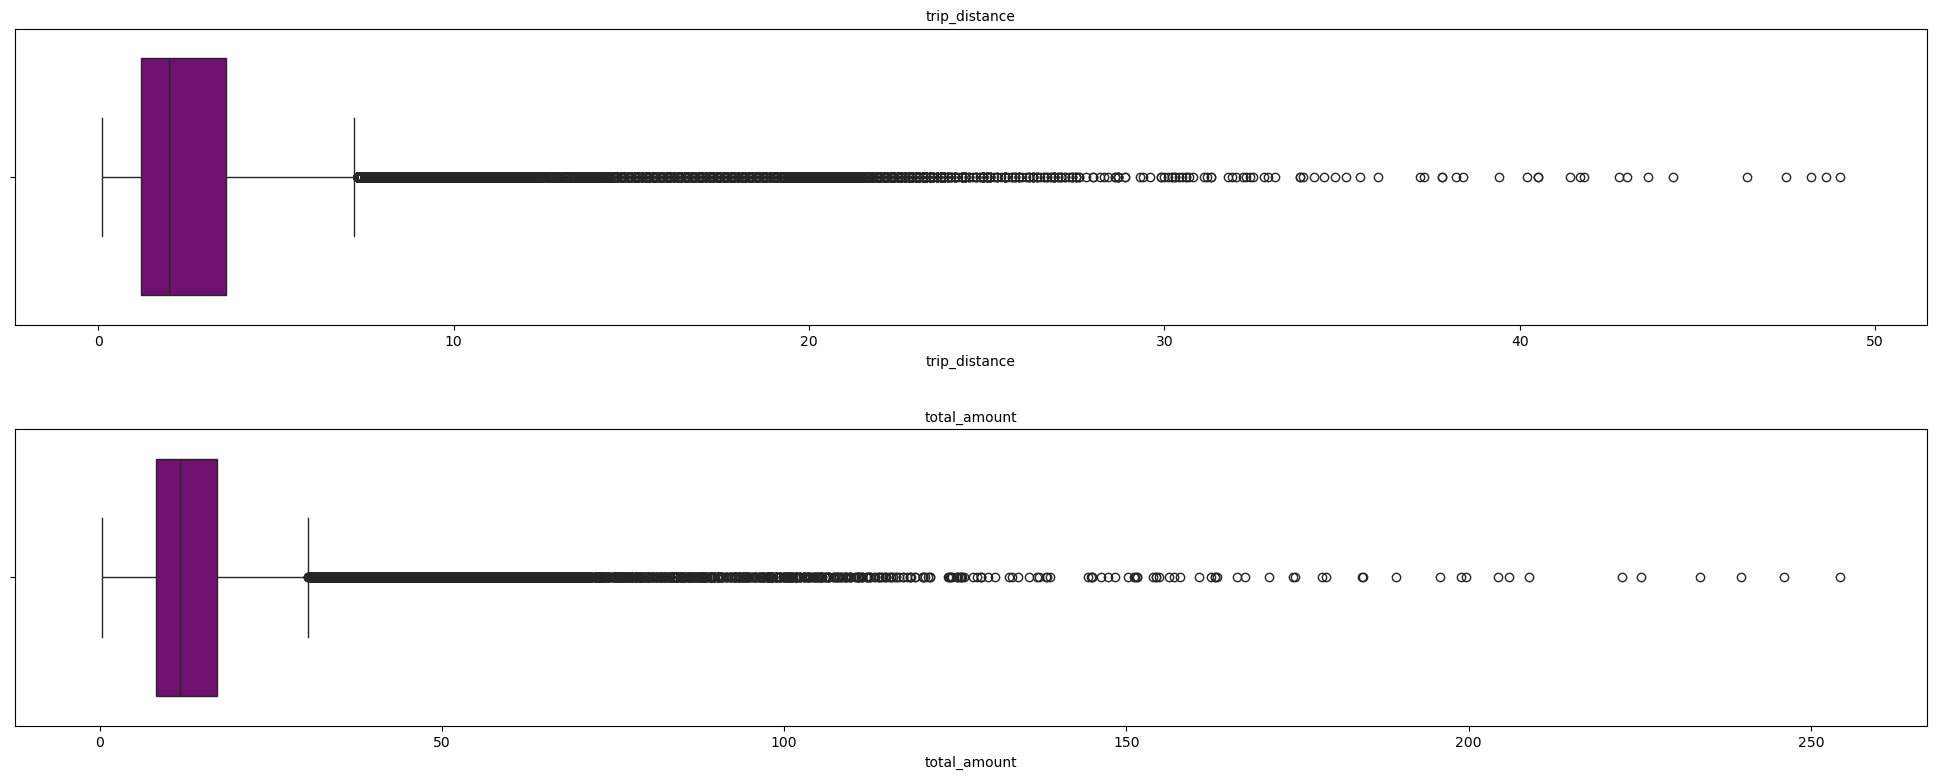

In [114]:
#Outlier Detection
numerical_cols=['trip_distance','total_amount']
plt.figure(figsize=(20, 12))
for i in range(len(numerical_cols)):
    plt.subplot(3,1, i + 1)
    sns.boxplot(x=df[numerical_cols[i]], color='purple')
    plt.title(numerical_cols[i], fontsize=10)
    plt.tight_layout(pad=3.0)
plt.show()

Each subplot shows:

    The middle line = median

    The box = interquartile range (25th–75th percentile)

    Whiskers = typically up to 1.5× IQR

    Dots outside whiskers = potential outliers

Outlier identification

    Points outside the whiskers are rides with unusually long trips, durations, or total costs—worth investigating or trimming for modeling.

Distribution insights

    A tall box = large IQR = high variability.

    Short whiskers = fewer extreme values.

    Symmetric boxes suggest a nearly normal distribution; skewed boxes indicate skew.

    You can easily see trip_duration_min is most prone to outliers

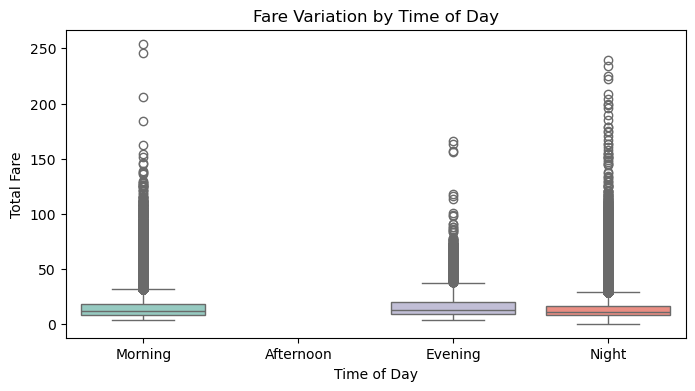

In [128]:
def time_of_day(hour):
    if 6 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'

df['hour'] = df['pickup_datetime'].dt.hour
df['time_of_day'] = df['hour'].apply(time_of_day)

plt.figure(figsize=(8,4))
sns.boxplot(
    x='time_of_day',
    y='total_amount',
    data=df,
    order=['Morning','Afternoon','Evening','Night'],
    palette='Set3'
)
plt.title('Fare Variation by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Fare')
plt.show()

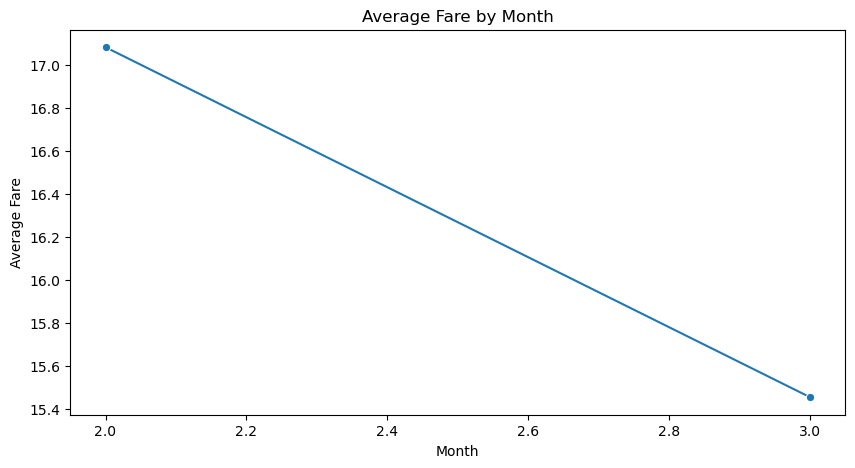

In [127]:
#2.Fare Trends by Month

df['month'] = df['pickup_datetime'].dt.month
monthly = df.groupby('month')['total_amount'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x='month', y='total_amount', marker='o')
plt.title('Average Fare by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.show()

February–March 2016: A Challenging Season for NYC Taxis

In early 2016, both Uber and Lyft introduced around 15% fare cuts in New York City—notably around January 28, 2016. (https://www.thestreet.com/opinion/uber-and-lyft-fare-cuts-hit-nyc-taxis-and-their-lenders-hard-13589200?)

This led to:

    A 27% decline in yellow taxi trips from their peak levels.
    

    February 2016 saw a 11.7% year-over-year drop in taxi ridership, with related farebox revenue down by 11% compared to February 2015.

    In March 2016, taxi trips and fare revenues continued to fall by 8.5% and 7.6% respectively, even though weather conditions were more 

favorable compared to March 2015 

    The dip in average fare from Feb to March 2016 in your dataset likely reflects:

    Competitive pricing actions by Uber/Lyft, which drew passengers away from taxis.

    Decline in taxi usage, as yellow cab ridership and revenues fell in early 2016.

    Lower average fares, influenced by fewer trips and less demand-driven (surge) pricing in that window.

we observed decline in fares between February and March 2016 appears to link clearly to industry-wide disruptions—notably the fare cuts by ride-hailing apps—leading to reduced taxi demand and lower average fares. This isn’t merely a seasonal dip, but part of a broader market shift that year.



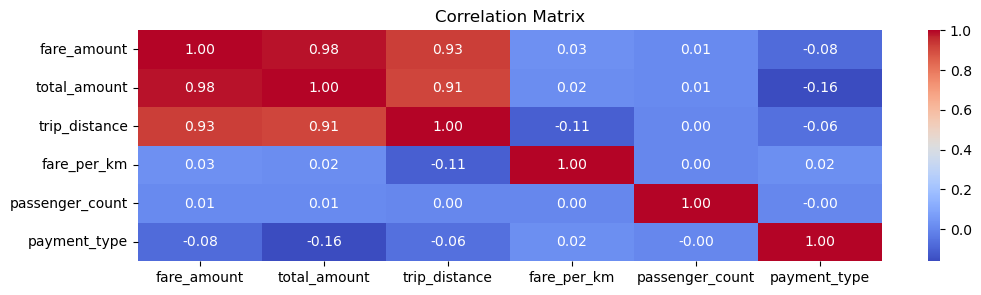

In [140]:
#CORRELATION BETWEEN COLUMNS
numerical_cols2=['fare_amount', 'total_amount','trip_distance','fare_per_km','passenger_count','payment_type']
corr = df[numerical_cols2].corr()

plt.figure(figsize=(12, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

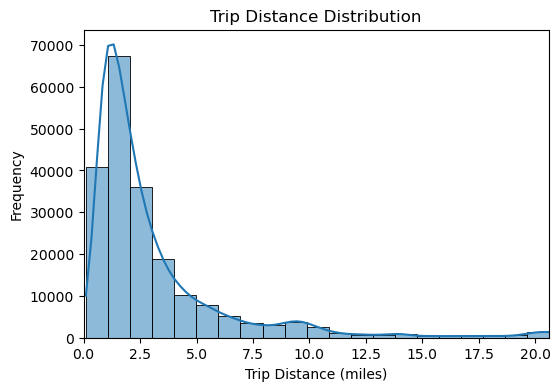

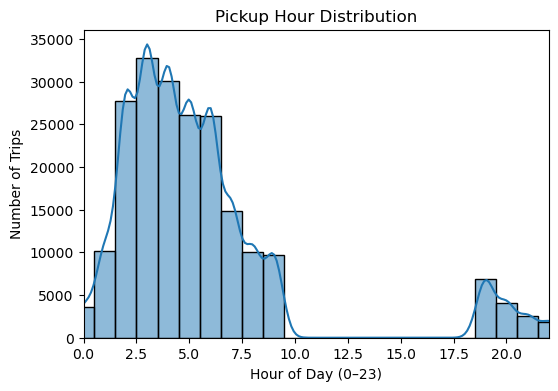

In [136]:
#Studying the distribution of trip distances and pickup hours.
#univariate analysis
plt.figure(figsize=(6,4))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.xlim(0, df['trip_distance'].quantile(0.99))  # Focus on most rides
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
plt.figure(figsize=(6, 4))
sns.histplot(
    data=df,
    x='pickup_hour',
    bins=24,              # Set bins for each hour
    discrete=True,        # Treat x-axis as discrete
    kde=True            
)
plt.xlim(0, df['pickup_hour'].quantile(0.99))
plt.title('Pickup Hour Distribution')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.show()

Trip Distance: heavily skewed right, most trips < 4 miles, long tail present

Pickup Hour Trends: spikes in morning/evening rush, lowest around 3–5 AM 


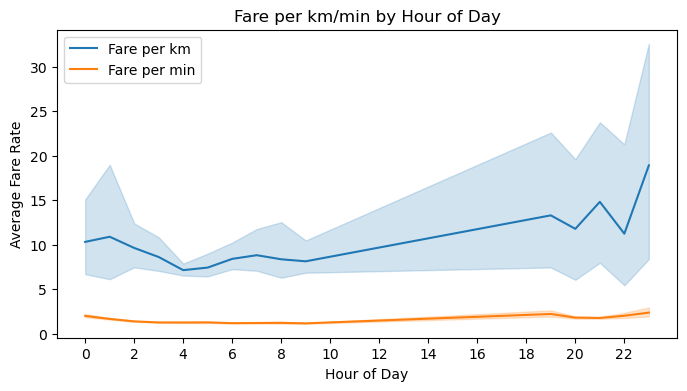

In [175]:
 #Fare-per-minute/mile by Time of Day

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['trip_duration'] = df['dropoff_datetime'] - df['pickup_datetime']
df['trip_duration_min'] = df['trip_duration'].dt.total_seconds() / 60

df['fare_per_min'] = (
    df['total_amount'] / df['trip_duration_min']
).replace({np.inf: np.nan, -np.inf: np.nan})
opt = {
  'estimator': 'mean', 'ci':95
}

plt.figure(figsize=(8,4))
sns.lineplot(x='pickup_hour', y='fare_per_km', data=df, **opt, label='Fare per km')
sns.lineplot(x='pickup_hour', y='fare_per_min', data=df, **opt, label='Fare per min')
plt.xticks(range(0,24,2))
plt.title('Fare per km/min by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare Rate')
plt.legend()
plt.show()

Fare per km

    Early morning (0–5h): Around $4–4.5 per km.

    Morning to early afternoon (6–12h): Peaks around $6–6.5 per km, likely due to typical base fares plus rush-hour/idle traffic factors, as defined by NYC taxi tariff rules (e.g. $3 initial charge + per-mile rates + surcharges). 

    Late afternoon to evening (13–20h): Declines to around $4 per km; traffic-heavy periods reduce effective mileage earnings.

    Night (21–23h): Rises again slightly (~$4.2), influenced by overnight surcharges ($1/night) in place. 

Fare per minute

    Montoored low (~1–2 $/min) — fairly consistent and stable.

    Rises slightly at night (~2–2.5 $/min) — indicating slower traffic, with drivers earning more per minute due to waiting or slow speeds.


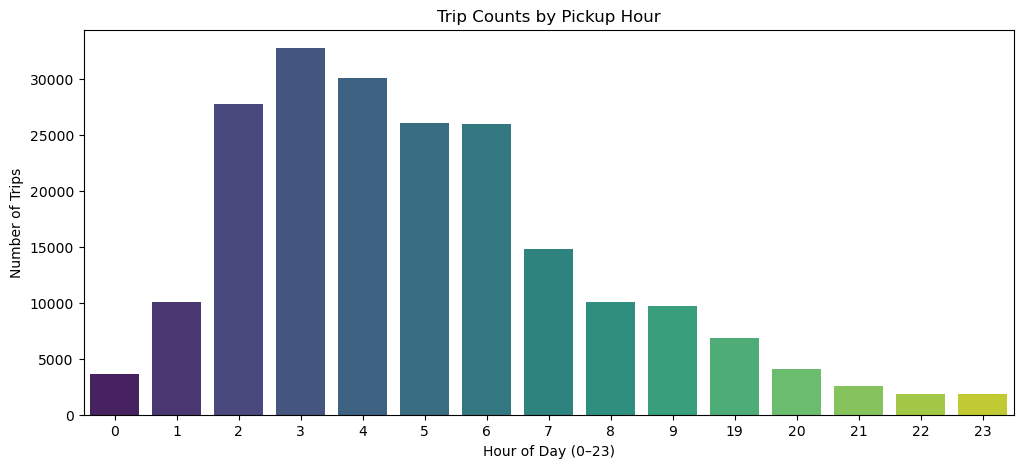

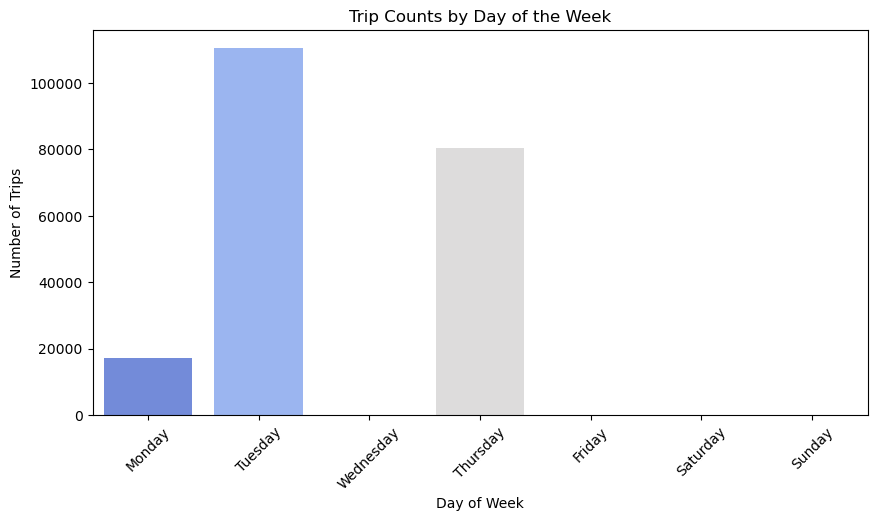

In [144]:
#To visualize trip counts by pickup hour and by day of the week, you can use the following steps—creating two clear plots that highlight when demand peaks:
#Trips by Pickup Hour:
# Ensure the pickup hour exists
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Plot trip counts per hour
plt.figure(figsize=(12, 5))
sns.countplot(
    x='pickup_hour',
    data=df,
    palette='viridis',
    order=sorted(df['pickup_hour'].unique())
)
plt.title('Trip Counts by Pickup Hour')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.show()

#Trips by Day of Week
# Create weekday names
df['pickup_day'] = df['pickup_datetime'].dt.day_name()

# Order days Monday → Sunday
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.countplot(
    x='pickup_day',
    data=df,
    palette='coolwarm',
    order=order
)
plt.title('Trip Counts by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

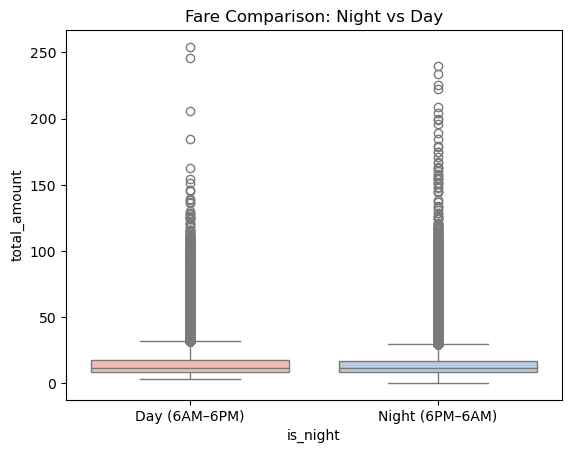

In [146]:
#Impact of Night Rides vs. Day Rides

df['is_night'] = df['pickup_hour'].between(18, 23) | df['pickup_hour'].between(0, 5)
sns.boxplot(x='is_night', y='total_amount', data=df, palette='Pastel1')
plt.xticks([0,1], ['Day (6AM–6PM)', 'Night (6PM–6AM)'])
plt.title('Fare Comparison: Night vs Day')
plt.show()


Observations from the Plot

Similar Medians

    The median fare is roughly the same for both day and night—around $10–$12—indicating that typical trip fares don't vary much by time of day.

Greater Fare Variability at Night

    The night-time box is taller, and the whiskers extend higher, indicating a wider spread of fares at night. This suggests that while most night fares are typical, there's a higher chance of encountering extreme fares—likely due to night surcharges, longer rides, or more traffic delays.

More High-End Outliers at Night

    There are more night fares exceeding $200–$250 compared to day rides. This implies rare but costly trips happen more often at night.

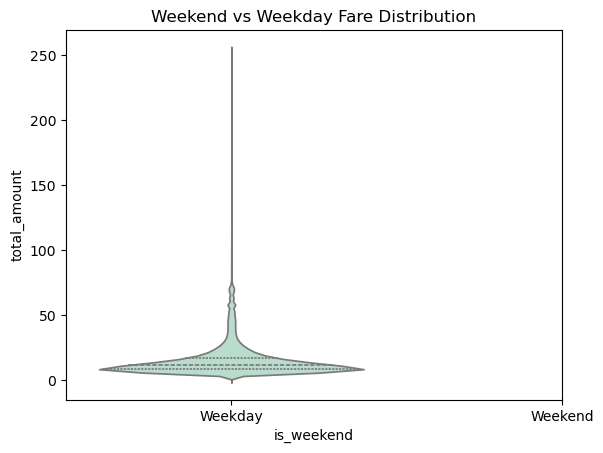

In [148]:
df['is_weekend'] = df['pickup_day'].isin(['Saturday', 'Sunday'])
sns.violinplot(x='is_weekend', y='total_amount', data=df, palette='Pastel2', inner='quartile')
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title('Weekend vs Weekday Fare Distribution')
plt.show()

<h1 style="font-size:40px;">Handling outliers</h1>


In [116]:
def remove_all_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Usage
df= remove_all_outliers(data, numerical_cols)


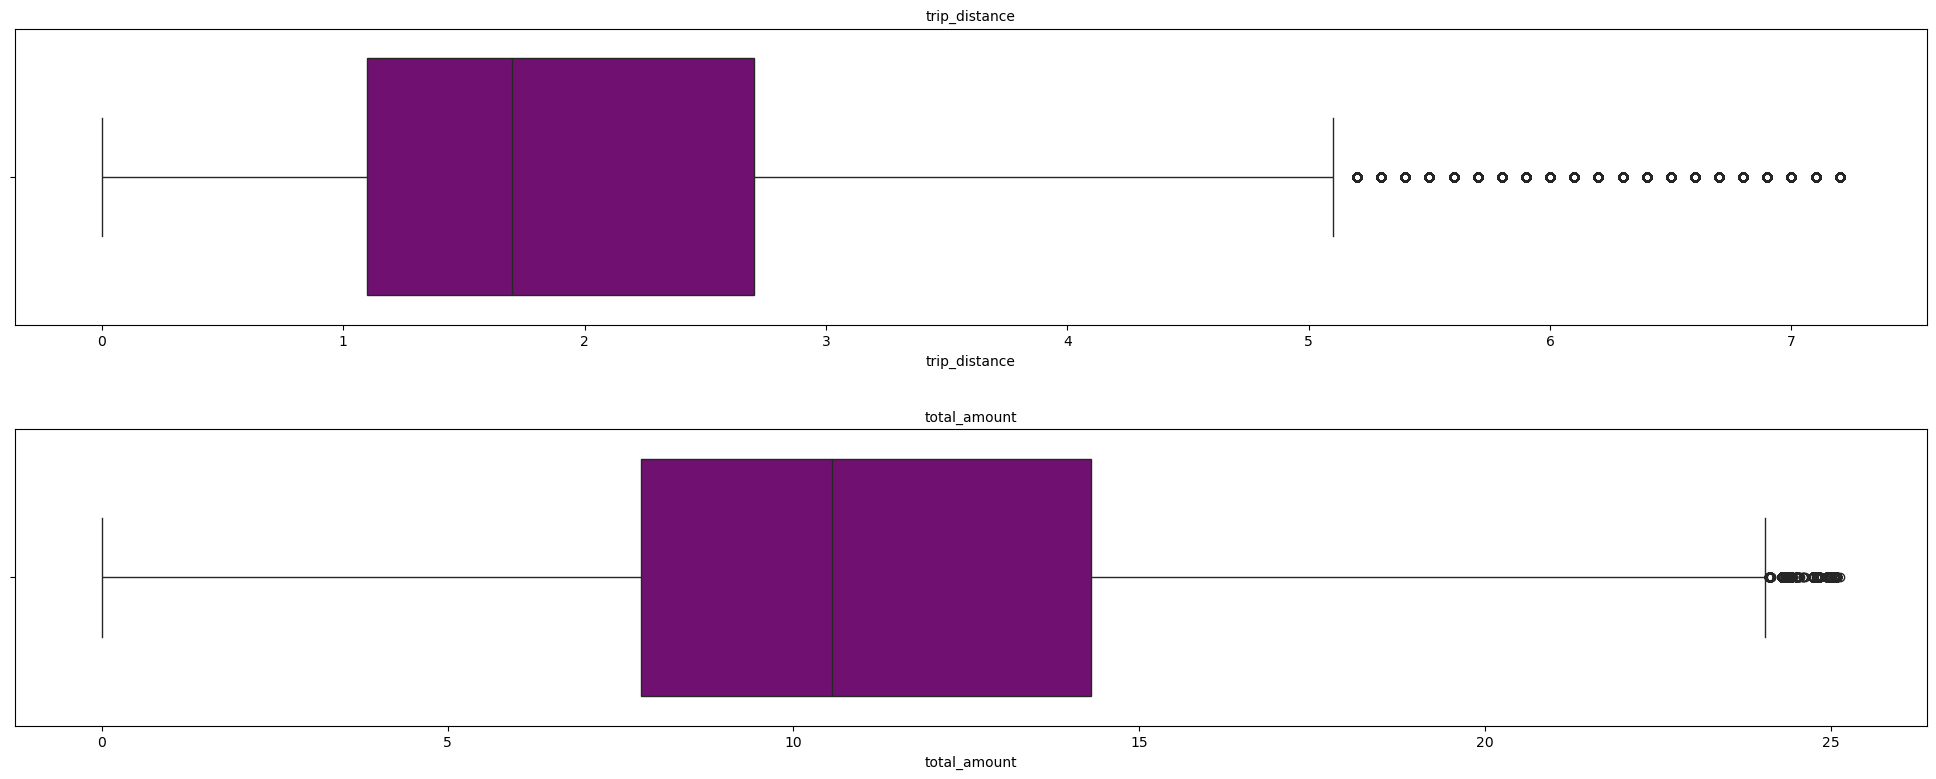

In [118]:
plt.figure(figsize=(20, 12))
for i in range(len(numerical_cols)):
    plt.subplot(3,1, i + 1)
    sns.boxplot(x=df[numerical_cols[i]], color='purple')
    plt.title(numerical_cols[i], fontsize=10)
    plt.tight_layout(pad=3.0)
plt.show()

In [151]:
df.shape

(181968, 22)

<h1 style="font-size:40px;">Fix Skewness</h1>

fixing skew for trip distance

In [120]:
df['trip_distance'].skew() #Positive Skew 

1.1982607206149973

Text(0.5, 1.0, 'Distribution with Skew')

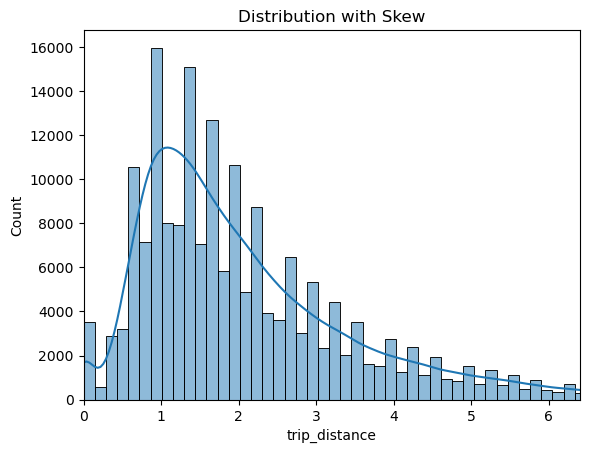

In [122]:
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.xlim(0, df['trip_distance'].quantile(0.99))
plt.title('Distribution with Skew')

In [123]:
df['trip_distance_log'] = np.log1p(df['trip_distance'])

In [124]:
df['trip_distance_log'].skew()

0.1840727172489532

fixing skewness in total amount

In [128]:
df['total_amount'].skew() #moderate skew

0.7552368382237027

Text(0.5, 1.0, 'Distribution with Skew')

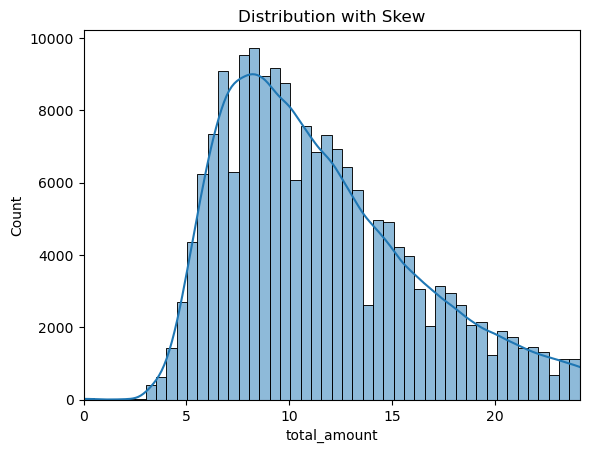

In [130]:
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.xlim(0, df['total_amount'].quantile(0.99))
plt.title('Distribution with Skew')

In [131]:
df['total_amount_sqrt'] = np.sqrt(df['total_amount'])

In [132]:
df['total_amount_sqrt'].skew()

0.34593248146210676

Text(0.5, 1.0, 'Distribution with Skew')

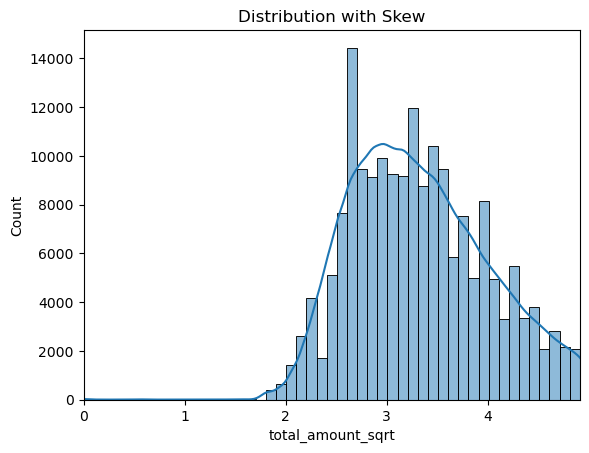

In [133]:
sns.histplot(df['total_amount_sqrt'], bins=50, kde=True)
plt.xlim(0, df['total_amount_sqrt'].quantile(0.99))
plt.title('Distribution with Skew')

<h1 style="font-size:40px;">Encoding</h1>

In [138]:
categorical_cols = ['pickup_day', 'am_pm']

In [140]:
# Manual binary mapping (explicitly readable)
df['pickup_day'] = df['pickup_day'].map({'Weekday': 0, 'Weekend': 1})
df['am_pm'] = df['am_pm'].map({'AM': 0, 'PM': 1})

In [ ]:
df_

<h1 style="font-size:40px;">scaling</h1>

In [144]:
scaler = StandardScaler()
cols_to_scale = ['fare_amount','trip_distance']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [181]:
df.to_csv("C:\\Users\\Appu\\Desktop\\data science\\taxi_data_visual.csv", index=False)
